# RC测试

In [14]:
import numpy as np

## 谱半径缩放

缩放原理：
1. 所有元素同除谱半径，特征值等比例也缩放
2. 再乘理想谱半径

In [17]:
# 获取谱半径
def getSpectralR(martix):
    eig = np.linalg.eigvals(martix)
    print(eig)
    return np.max(abs(eig))

# 谱半径缩放 return martix
def scaledMartix(martix,spectralR_pre):
    oldSpectralR = getSpectralR(martix)
    return (martix / oldSpectralR) * spectralR_pre

In [19]:
# 测试
martix = np.array([[2,1],[1,2]])
spectralR_pre = 1.1

martix2 = scaledMartix(martix, spectralR_pre)
spectralR = getSpectralR(martix2)
print(oldSpectralR, spectralR)

[3. 1.]
[1.1        0.36666667]
3.0 1.1


## 稀疏和稠密网络对比

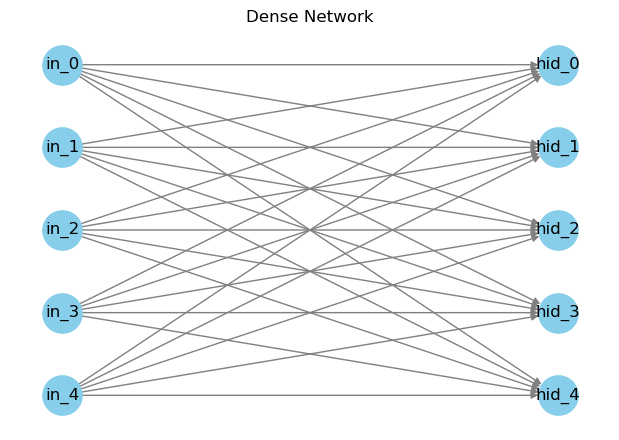

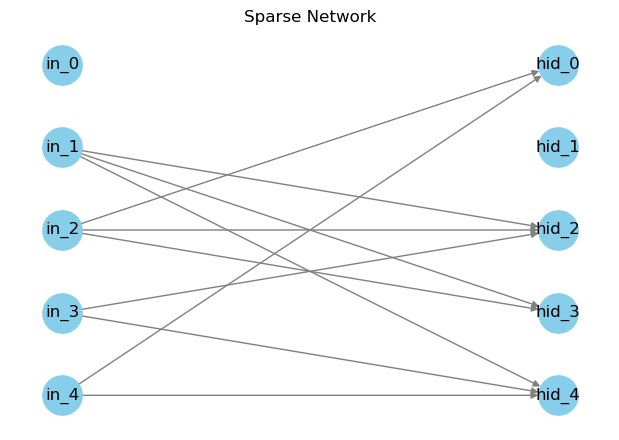

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_layered_graph(input_size, hidden_size, sparsity=1.0):
    G = nx.DiGraph()
    input_nodes = [f'in_{i}' for i in range(input_size)]
    hidden_nodes = [f'hid_{i}' for i in range(hidden_size)]

    G.add_nodes_from(input_nodes, layer='input')
    G.add_nodes_from(hidden_nodes, layer='hidden')

    for i in input_nodes:
        for h in hidden_nodes:
            if random.random() < sparsity:  # 控制连接稀疏度
                G.add_edge(i, h)

    return G, input_nodes, hidden_nodes

def draw_network(G, input_nodes, hidden_nodes, title):
    pos = {}
    # 设置输入层位置
    for i, node in enumerate(input_nodes):
        pos[node] = (-1, -i)
    # 设置隐藏层位置
    for i, node in enumerate(hidden_nodes):
        pos[node] = (1, -i)

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=800,
            node_color='skyblue', edge_color='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# 参数
input_size = 5
hidden_size = 5

# 稠密网络（sparsity=1.0）
dense_G, dense_input, dense_hidden = create_layered_graph(input_size, hidden_size, sparsity=1.0)
draw_network(dense_G, dense_input, dense_hidden, "Dense Network")

# 稀疏网络（sparsity=0.4）
sparse_G, sparse_input, sparse_hidden = create_layered_graph(input_size, hidden_size, sparsity=0.4)
draw_network(sparse_G, sparse_input, sparse_hidden, "Sparse Network")
